In [18]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   

## Leemos markdown

In [2]:
clientes = pd.read_csv('../data/raw/clientes.csv')
polizas = pd.read_csv('../data/raw/polizas.csv')
siniestros = pd.read_csv('../data/raw/siniestros.csv')

#### Revisamos estructura

In [3]:
clientes.info()
polizas.info()
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_Cliente        12000 non-null  int64 
 1   Nombre            12000 non-null  object
 2   Apellido          12000 non-null  object
 3   Edad              12000 non-null  int64 
 4   genero            12000 non-null  object
 5   pais              12000 non-null  object
 6   ingresos_anuales  12000 non-null  int64 
 7   fecha_registro    12000 non-null  object
dtypes: int64(3), object(5)
memory usage: 750.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_poliza     15000 non-null  int64  
 1   ID_cliente    15000 non-null  int64  
 2   Tipo_seguro   15000 non-null  object 
 3   Estado        15000 non-null  object 
 4   Prima_anu

### Verinifcamos que no hay nulos

In [6]:
clientes.isna().sum()
polizas.isna().sum()
siniestros.isna().sum()

id_siniestro       0
id_poliza          0
fecha_siniestro    0
tipo_siniestro     0
coste_siniestro    0
dtype: int64

### ¿ Cuantos clientes unicos hay?

In [13]:
clientes['ID_Cliente'].nunique()

12000

In [27]:
polizas['ID_cliente'].nunique()

8554

In [14]:
clientes.duplicated(['ID_Cliente']).sum()

np.int64(0)

“Tenemos 12,000 clientes únicos en el dataset. Verifiqué que no hay duplicados en el identificador id_cliente.”

### ¿Cuantos polizas promedio tiene el cliente?

In [17]:
polizas.groupby('ID_cliente')['ID_poliza'].count().mean()

np.float64(1.7535655833528174)

Text(0.5, 0, 'Número de Pólizas por Cliente')

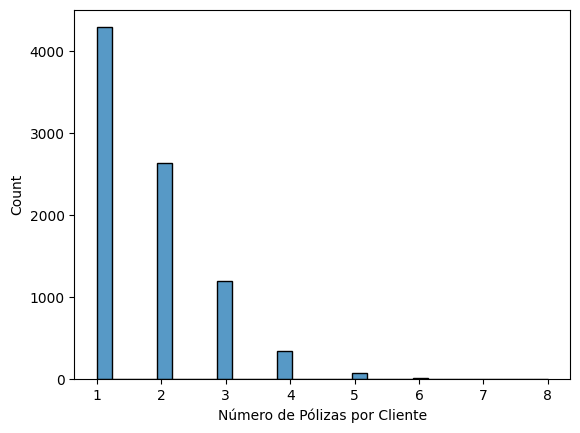

In [21]:
sns.histplot(polizas.groupby('ID_cliente')['ID_poliza'].count(), bins=30)
plt.xlabel('Número de Pólizas por Cliente')

### Cada cliente tiene en promedio 1.7 pólizas. Algunos tienen una sola, pero hay clientes con más de 3.”

### ¿Qué porcentaje de pólizas están activas o canceladas

Text(0.5, 0, 'Estado de la Póliza')

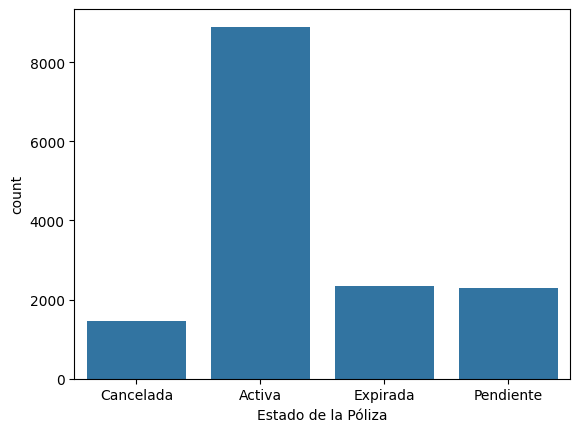

In [23]:
polizas['Estado'].value_counts(normalize=True) * 100
sns.countplot(data=polizas, x='Estado')
plt.xlabel('Estado de la Póliza')

### ¿Cuál es la media de la prima anual?

In [25]:
polizas['Prima_anual'].mean()

np.float64(85.81003533333333)

In [26]:
polizas['Prima_anual'].describe()

count    15000.000000
mean        85.810035
std        998.936948
min      -3516.690000
25%       -583.017500
50%         93.295000
75%        754.357500
max       4794.470000
Name: Prima_anual, dtype: float64

“La prima media anual es de aproximadamente 86 €, aunque con bastante dispersión según el tipo de seguro.”